# Breast Cancer Prediction Pipeline
This notebook implements multiple classification models to predict whether a tumor is malignant or benign based on various features.

In [7]:
#%pip install missingno

In [8]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For mathematical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import missingno as msno  # For visualizing missing values
import warnings  # To ignore any warnings

# Set visualization aesthetics
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load the dataset
df = pd.read_csv("breast-cancer.csv")  # Read the CSV file into a pandas DataFrame

# Display the first 5 rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check unique values in the 'diagnosis' column
df['diagnosis'].unique()

# Summary statistics
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: >

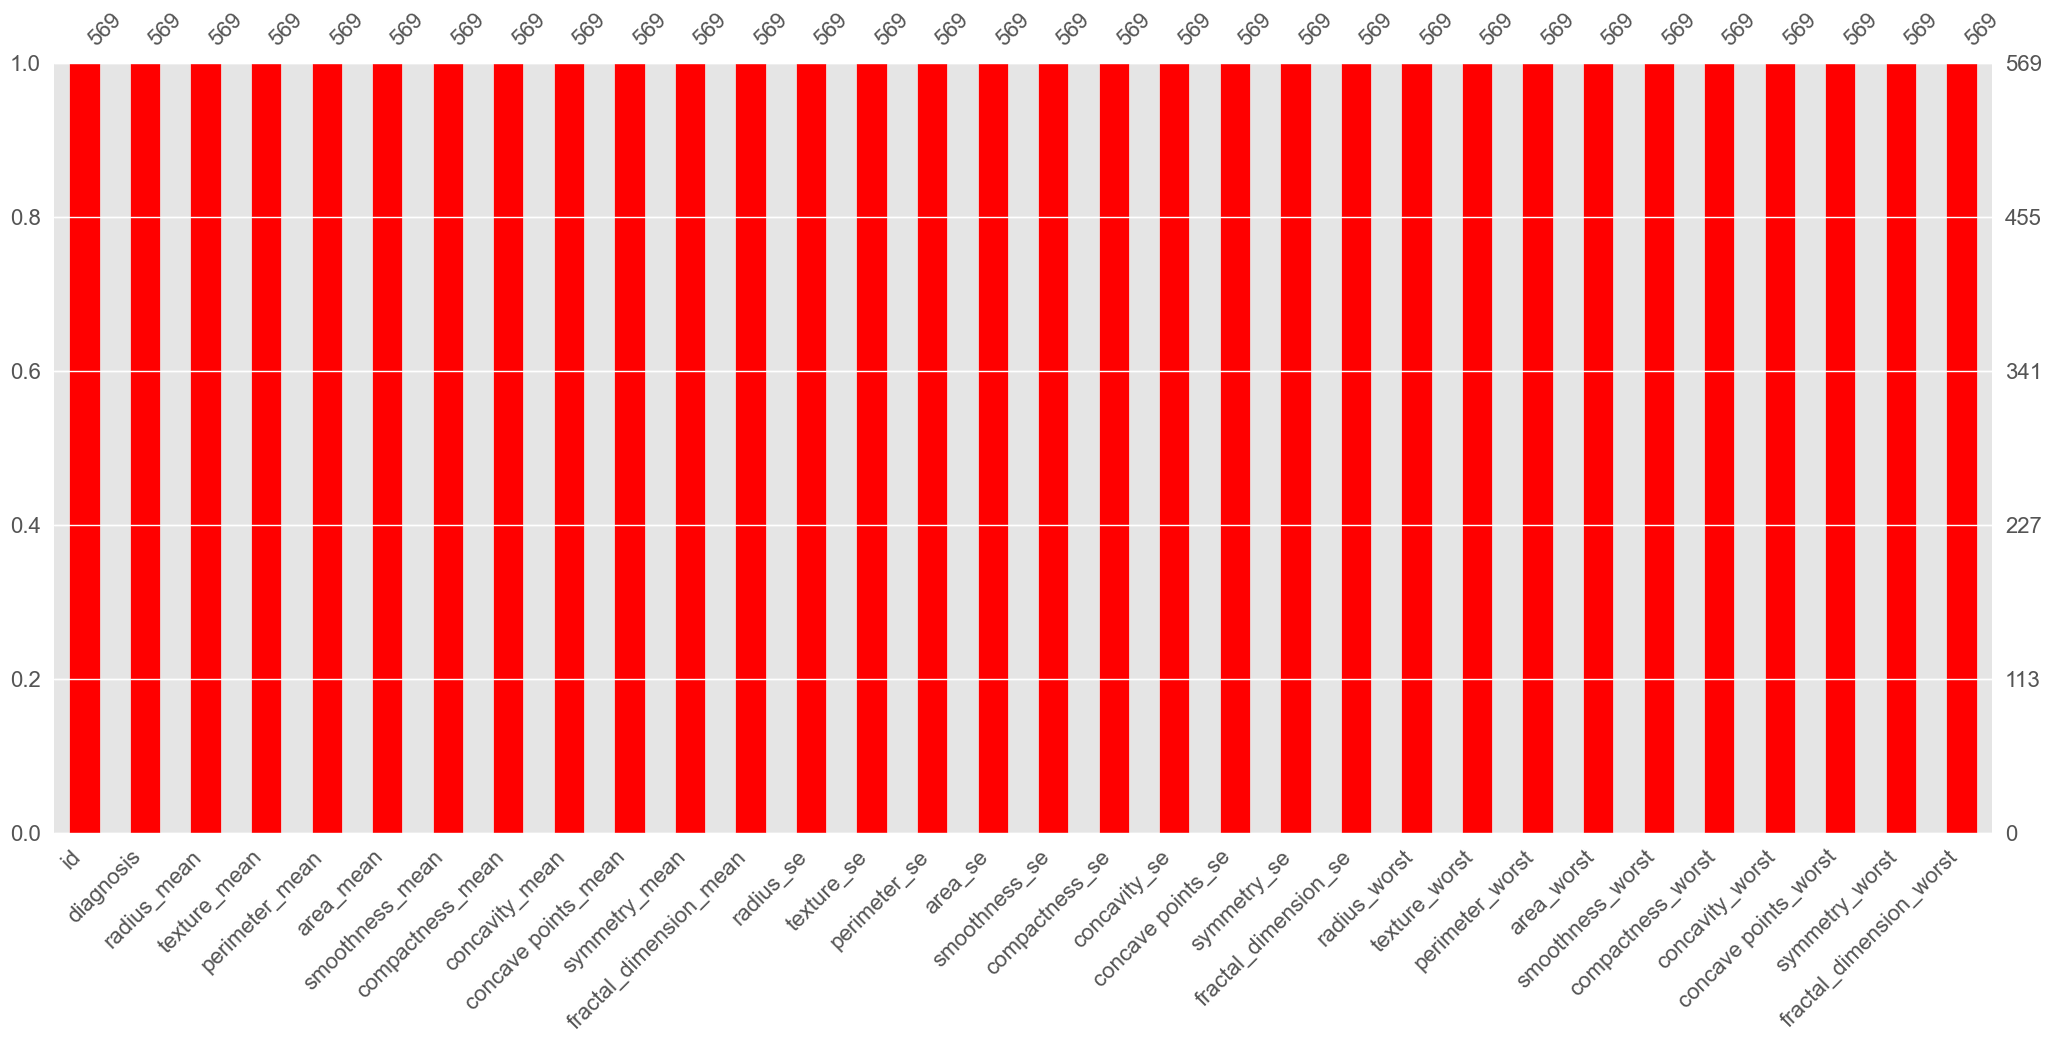

In [ ]:
# Display concise info about the DataFrame
df.info()

# Check for missing values
df.isnull().sum()

# Visualize completeness of the DataFrame
msno.bar(df, color="red")


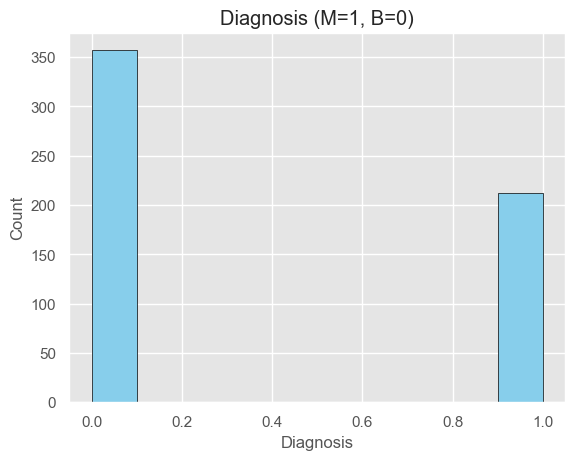

In [ ]:
# Convert 'diagnosis' from categorical to numerical
# M -> 1 (Malignant), B -> 0 (Benign)
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

# Plot histogram of diagnosis
plt.hist(df['diagnosis'], color='skyblue', edgecolor='black')
plt.title('Diagnosis (M=1, B=0)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


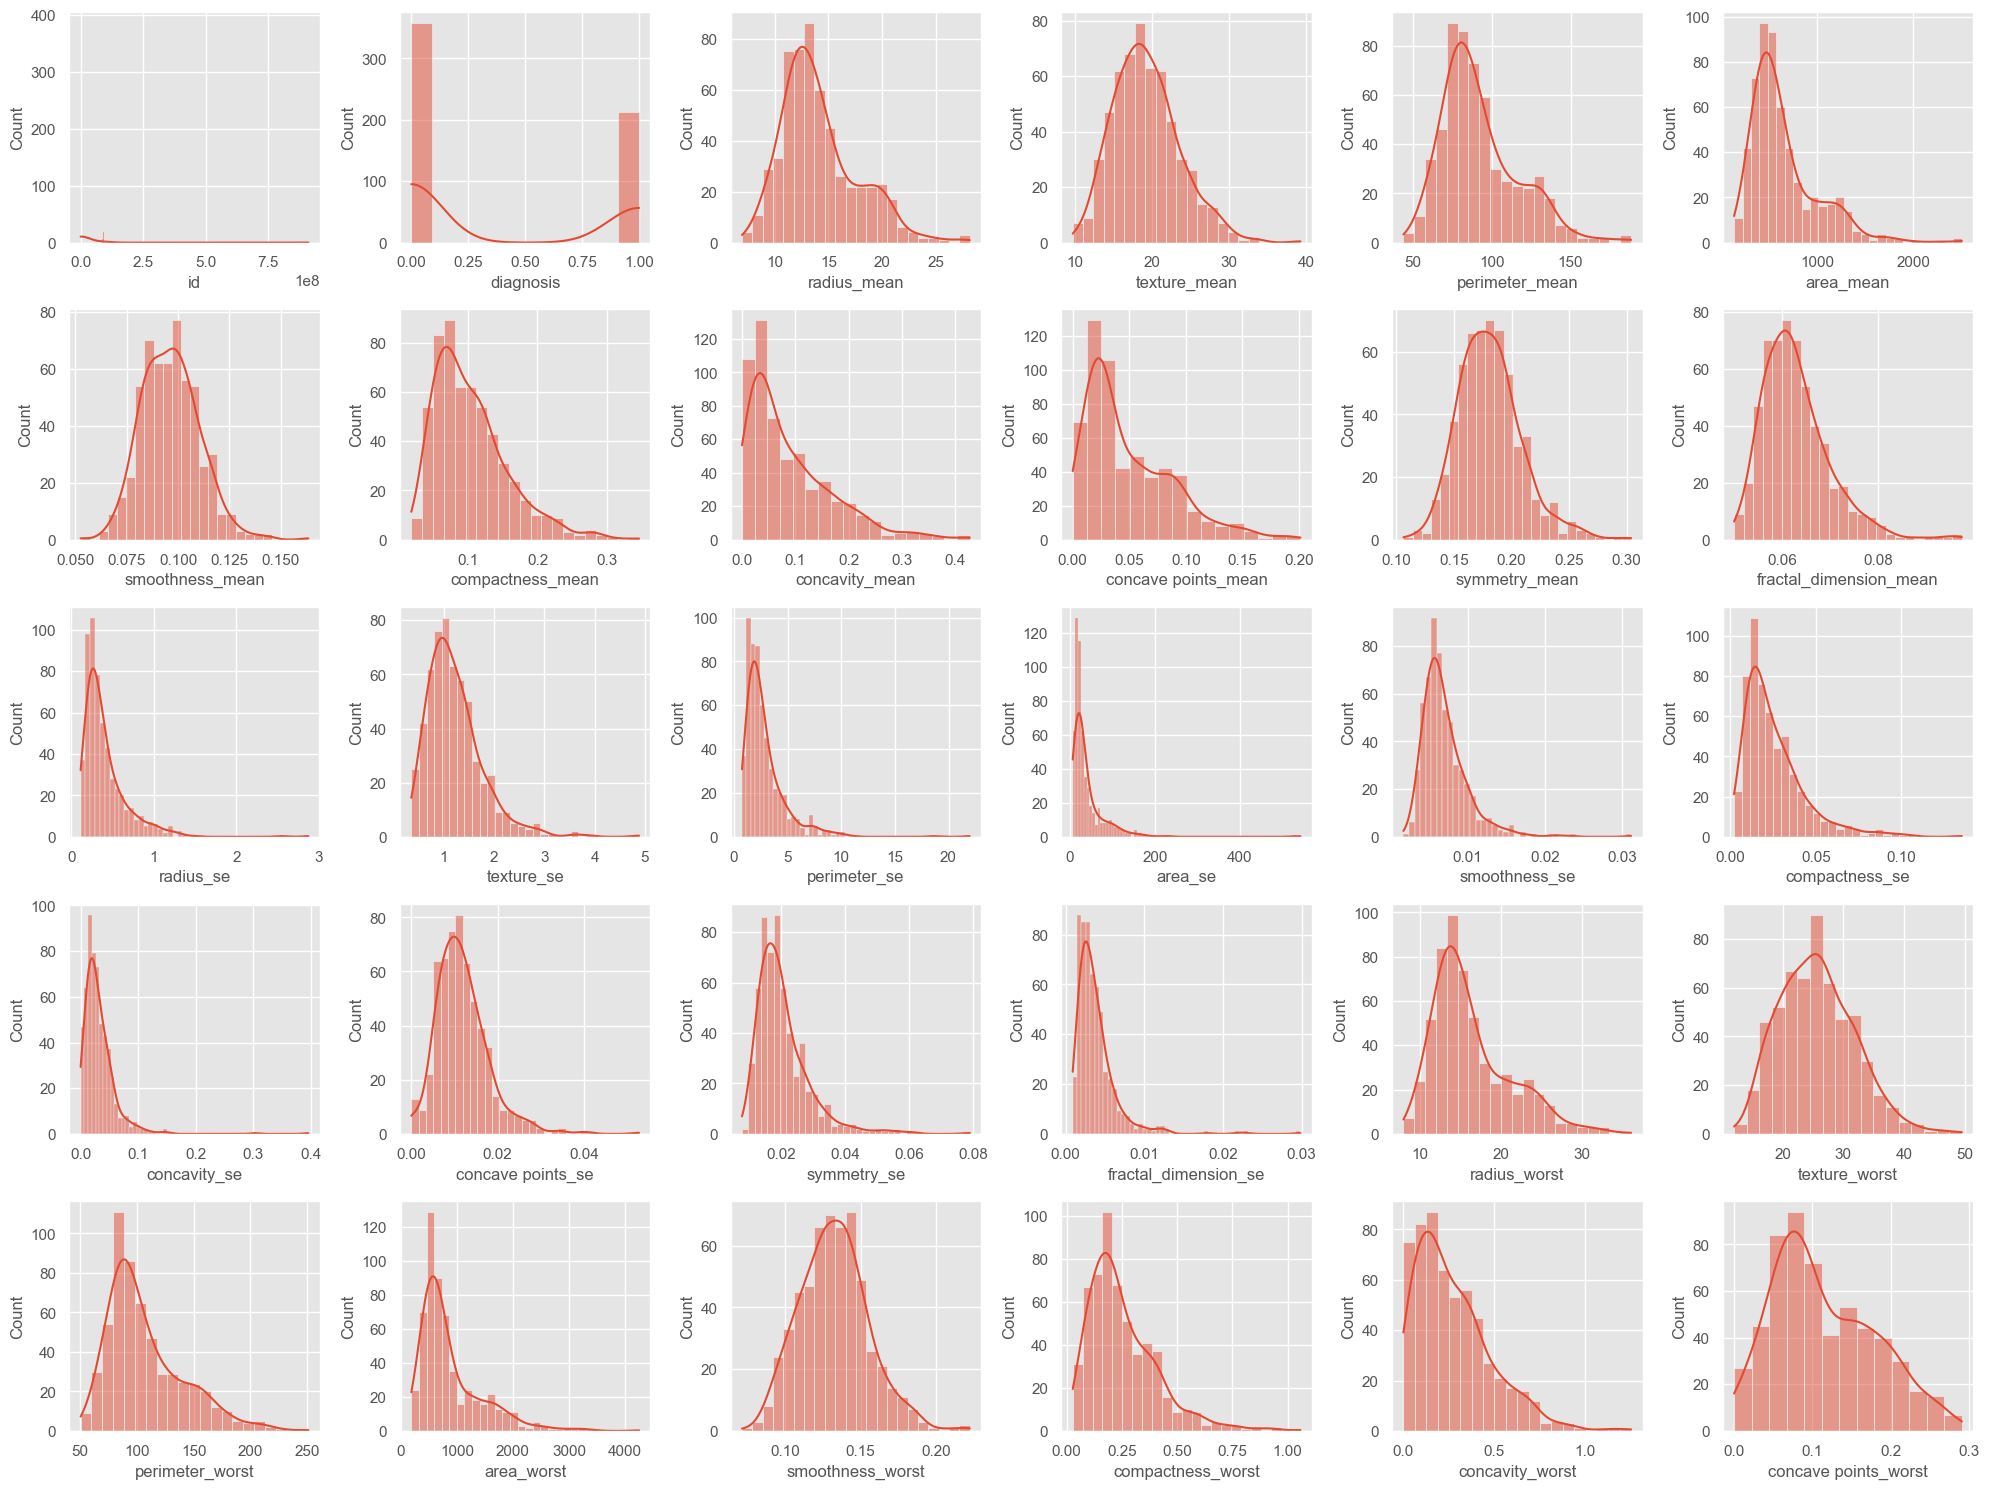

In [ ]:
# Plot distribution of the first 30 features
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()


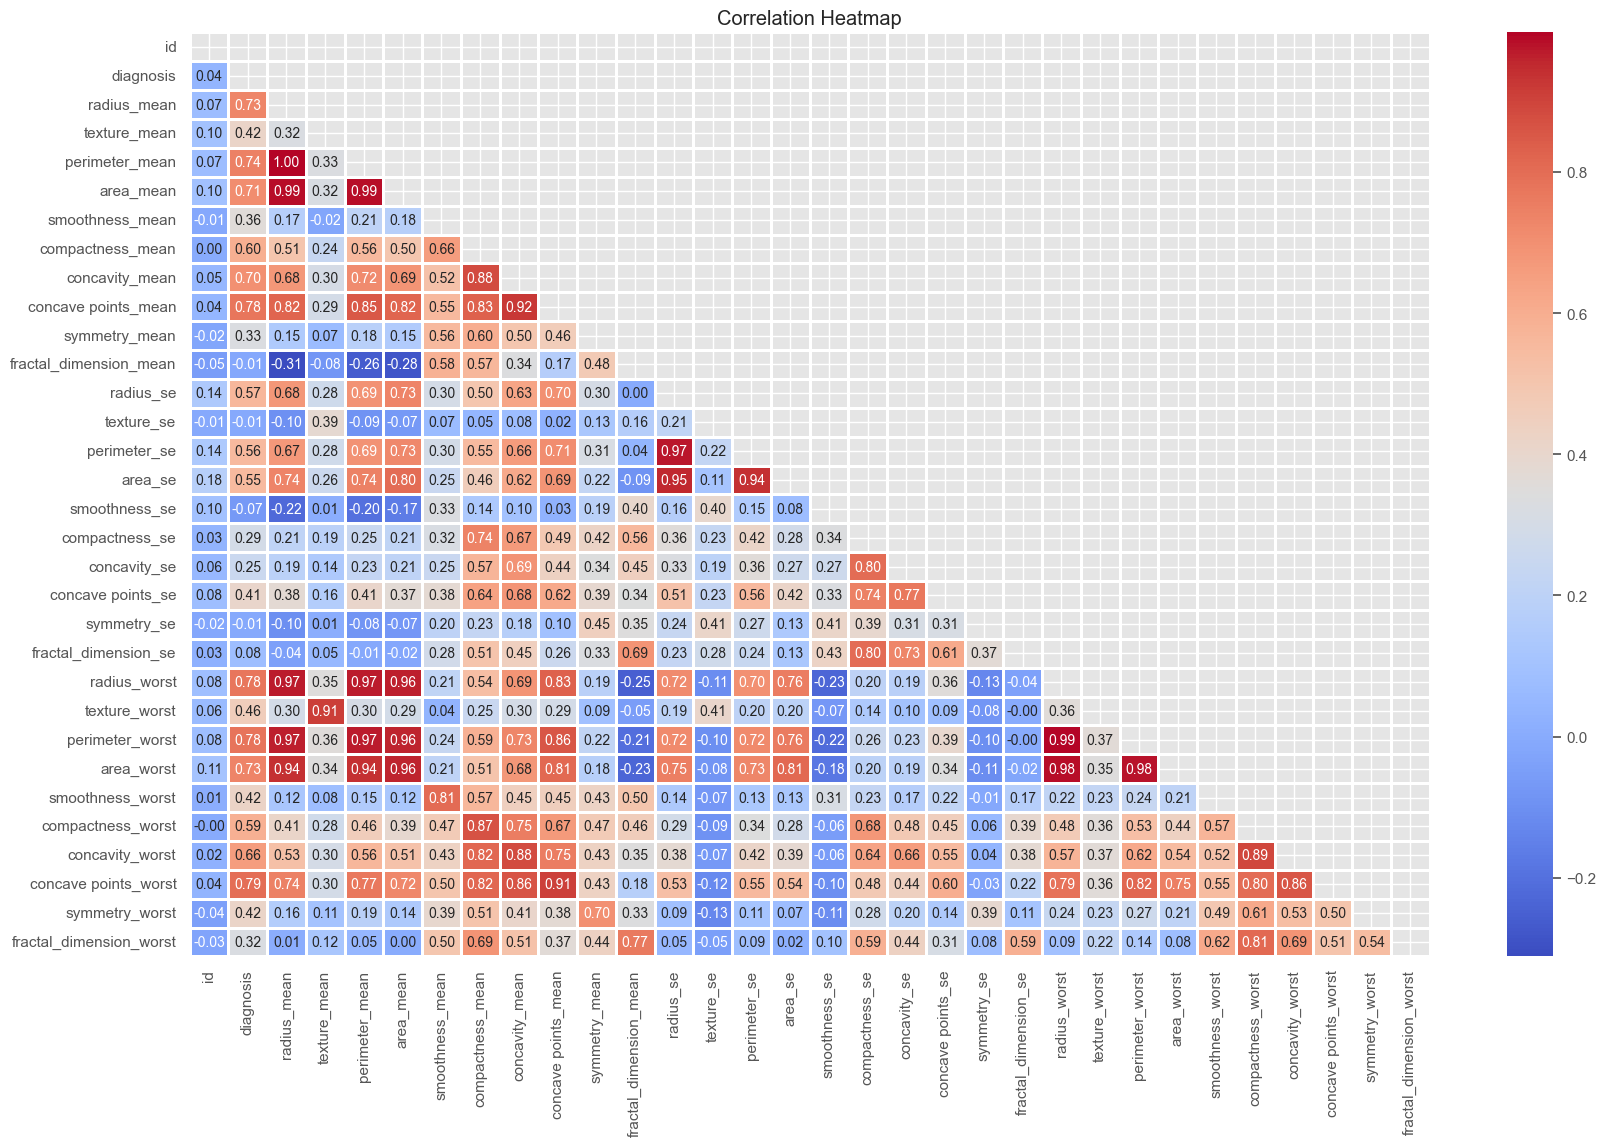

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap with upper triangle mask
plt.figure(figsize=(20, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Drop the 'id' column
df.drop('id', axis=1, inplace=True)

# Compute absolute correlation matrix
corr_matrix = df.corr().abs()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to hide upper triangle
tri_df = corr_matrix.mask(mask)

# Identify columns with correlation above 0.92
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

# Drop highly correlated columns
df = df.drop(to_drop, axis=1)

# Print remaining number of features
print("Remaining features:", df.shape[1])

# Preview updated DataFrame
df.head()


Remaining features: 23


,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Split into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check shape of training data
X_train.shape
pickle.dump(scaler, open("scaler.pkl", "wb"))  # Save scaler


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
# Evaluation
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9649122807017544
Confusion Matrix:
[[66  1]
 [ 3 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_train, knn.predict(X_train))

# Evaluation
print(f"Training Accuracy: {knn_acc}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Training Accuracy: 0.967032967032967
Testing Accuracy: 0.956140350877193
Confusion Matrix:
[[66  1]
 [ 4 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize SVC with probability=True for soft decision output
svc = SVC(probability=True)

# Hyperparameter grid
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

# Grid search setup
grid_search = GridSearchCV(svc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train SVC with best parameters
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_train, svc.predict(X_train))
print("Training Accuracy:",svc_acc )
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 15, 'gamma': 0.01}
Best cross-validation score: 0.9802197802197803
Training Accuracy: 0.989010989010989
Testing Accuracy: 0.9824561403508771
Confusion Matrix:
 [[67  0]
 [ 2 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'splitter': ['best', 'random']
}

# Grid search with 5-fold cross-validation
grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation score:", grid_search_dt.best_score_)

# Train Decision Tree with best parameters
dtc = DecisionTreeClassifier(
    criterion='entropy', max_depth=15,
    min_samples_leaf=4, min_samples_split=5, splitter='random'
)
dtc.fit(X_train, y_train)
dtc_acc = accuracy_score(y_train, dtc.predict(X_train))
# Evaluation
print("Training Accuracy:", dtc_acc)
print("Testing Accuracy:", accuracy_score(y_test, dtc.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, dtc.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, dtc.predict(X_test)))


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'random'}
Best cross-validation score: 0.9582417582417582
Training Accuracy: 0.9626373626373627
Testing Accuracy: 0.9385964912280702
Confusion Matrix:
 [[66  1]
 [ 6 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest with tuned hyperparameters
rand_clf = RandomForestClassifier(
    criterion='entropy', max_depth=10,
    max_features=0.5, min_samples_leaf=2,
    min_samples_split=3, n_estimators=130,
    random_state=0
)

# Train Random Forest
rand_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rand_clf.predict(X_test)
rand_clf_acc = accuracy_score(y_train, rand_clf.predict(X_train))
print("Training Accuracy:", rand_clf_acc)
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9978021978021978
Testing Accuracy: 0.9736842105263158
Confusion Matrix:
 [[66  1]
 [ 2 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Hyperparameter grid
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

# Grid search with 2-fold cross-validation
grid_search_gbc = GridSearchCV(gbc, parameters, cv=2, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

print("Best parameters:", grid_search_gbc.best_params_)
print("Best cross-validation score:", grid_search_gbc.best_score_)

# Train Gradient Boosting with best parameters
gbc = GradientBoostingClassifier(
    learning_rate=0.1, loss='exponential', n_estimators=180
)
gbc.fit(X_train, y_train)
gbc_acc = accuracy_score(y_train, gbc.predict(X_train))
# Evaluation
print("Training Accuracy:", gbc_acc)
print("Testing Accuracy:", accuracy_score(y_test, gbc.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, gbc.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, gbc.predict(X_test)))


Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
Best cross-validation score: 0.9560727258675323
Training Accuracy: 1.0
Testing Accuracy: 0.9736842105263158
Confusion Matrix:
 [[66  1]
 [ 2 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train XGBoost model
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=5, n_estimators=180, use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb.fit(X_train, y_train)

# Evaluate XGBoost
print("Training Accuracy:", accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print("Testing Accuracy:", xgb_acc)

y_pred = xgb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Create a DataFrame to compare model performance
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'KNN', 'SVM',
        'Decision Tree Classifier', 'Random Forest Classifier',
        'Gradient Boosting Classifier', 'XGBoost'
    ],
    'Score (%)': [
        100 * round(train_accuracy, 4),
        100 * round(knn_acc, 4),
        100 * round(svc_acc, 4),
        100 * round(dtc_acc, 4),
        100 * round(rand_clf_acc, 4),
        100 * round(gbc_acc, 4),
        100 * round(xgb_acc, 4)
    ]
})

print(models.sort_values(by='Score (%)', ascending=False))


Training Accuracy: 0.9956043956043956
Testing Accuracy: 0.9473684210526315
Confusion Matrix:
 [[64  3]
 [ 3 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

                          Model  Score (%)
5  Gradient Boosting Classifier     100.00
4      Random Forest Classifier      99.78
0           Logistic Regression      98.90
2                           SVM      98.90
1                           KNN      96.70
3      Decision Tree Classifier      96.26
6                       XGBoost      94.74


In [ ]:
import pickle

# Save the best performing model - here SVM as an example
model = svc
pickle.dump(model, open("breast_cancer_model.pkl", "wb"))
print("Model saved as 'breast_cancer_model.pkl'")


Model saved as 'breast_cancer_model.pkl'


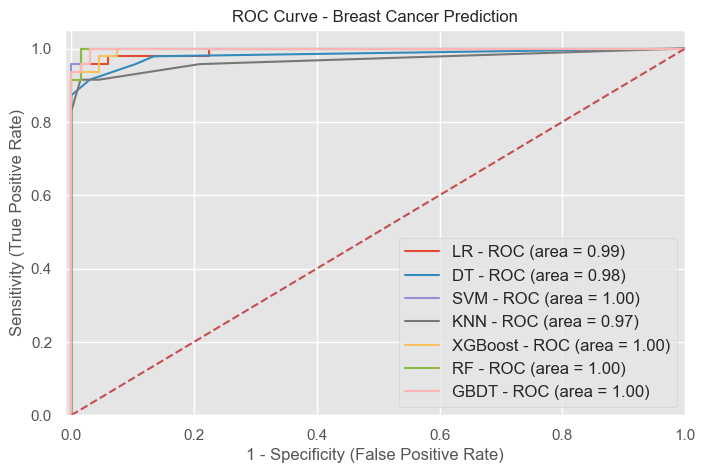

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

# List of models with their labels
models_list = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc},
]

for m in models_list:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{m['label']} - ROC (area = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'r--')  # No skill line
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC Curve - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", dpi=400, bbox_inches='tight')
plt.show()


Accuracy Scores: [98.9, 96.7, 98.9, 96.26, 94.74000000000001, 99.78, 100.0]
ROC AUC Scores: [np.float64(99.36), np.float64(93.78999999999999), np.float64(99.94), np.float64(96.82), np.float64(99.62), np.float64(99.87), np.float64(99.78)]


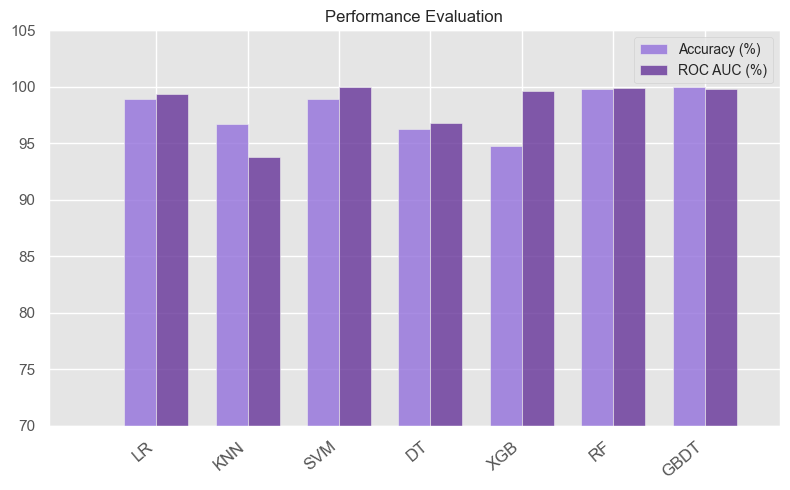

In [ ]:
# Pre-calculated accuracy scores for each model
means_accuracy = [
    100 * round(train_accuracy, 4),  # Logistic Regression
    100 * round(knn_acc, 4),
    100 * round(svc_acc, 4),
    100 * round(dtc_acc, 4),
    100 * round(xgb_acc, 4),
    100 * round(rand_clf_acc, 4),
    100 * round(gbc_acc, 4)
]

means_roc = []

# Calculate ROC AUC for each model
for m in models_list:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    means_roc.append(100 * round(auc, 4))

print("Accuracy Scores:", means_accuracy)
print("ROC AUC Scores:", means_roc)

# Plotting bar chart
n_groups = len(models_list)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots(figsize=(8, 5))

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC AUC (%)')

plt.xlim([-1, n_groups])
plt.ylim([70, 105])
plt.title('Performance Evaluation', fontsize=12)
plt.xticks(index + bar_width / 2, ['LR', 'KNN', 'SVM', 'DT', 'XGB', 'RF', 'GBDT'], rotation=40, ha='right', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.savefig("performance_evaluation_breast_cancer.jpeg", dpi=400, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Suppose X_train is your training DataFrame with reduced features
FEATURES = df.drop('diagnosis', axis=1).columns.tolist()  # Save feature names before scaling

scaler = StandardScaler()
scaler.fit(X_train)

# Save both
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(FEATURES, 'features.pkl')


['features.pkl']

In [ ]:
import pickle
import pandas as pd
import joblib

# Load the scaler and features list
scaler = joblib.load('scaler.pkl')
FEATURES = joblib.load('features.pkl')  # This was saved during training

# Example input (you need to include ALL features used during training)
input_data = {
'texture_mean': 10.38,
'smoothness_mean': 0.1184,
'compactness_mean': 0.2776,
'concave points_mean': 0.1471,
'symmetry_mean': 0.2419,
'fractal_dimension_mean': 0.07871,
'texture_se': 0.9053,
'area_se': 153.4,
'smoothness_se': 0.006399,
'compactness_se': 0.04904,
'concavity_se': 0.05373,
'concave points_se': 0.01587,
'symmetry_se': 0.03003,
'fractal_dimension_se': 0.006193,
'texture_worst': 17.33,
'area_worst': 2019.0,
'smoothness_worst': 0.1622,
'compactness_worst': 0.6656,
'concavity_worst': 0.7119,
'concave points_worst': 0.2654,
'symmetry_worst': 0.4601,
'fractal_dimension_worst': 0.1189
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Align columns exactly as in training
input_df = input_df.reindex(columns=FEATURES, fill_value=0)  # Ensure all required features are present and ordered

# Scale
input_scaled = scaler.transform(input_df)

# Load the model
model_name = 'breast_cancer_model'
model_path = f'{model_name}.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Predict
output = model.predict(input_scaled)

# Result
if output[0] == 0:
    print('The tumor is benign.')
else:
    print('The tumor is malignant.')


The tumor is malignant.
